In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [283]:
a = 0.18
b = 1.41
c = 3.65
d = 1.0

In [284]:
e0 = np.array([1, 0])
e1 = np.array([0, 1])

In [285]:
A = np.array([[d, -1.0],
             [-1.0, c]])

B = np.array([[-d, 1.0],
             [1.0, -c]])

In [286]:
x0, y0 = .7, .3

In [287]:
def EWA_Alt_Hardcode(X, a=.18, b=1.41):
    x0,y0 = X
    x1, y1 = 1.0-x0, 1.0-y0
    Y = np.array([y0, y1])
    Ay0 = d*y0-y1
    Ay1 = -y0+c*y1
    #Update x
    XNum = math.pow(x0, 1.0-a)
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*(Ay1-Ay0))
    #Update y
    fx0 = XNum / XDenom
    fx1 = 1.0 - fx0
    
    Bx0 = -d*fx0+fx1
    Bx1 = fx0-c*fx1
    YNum = math.pow(y0, 1.0-a)
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*(Bx1-Bx0))
    fy0 = YNum / YDenom
    return [fx0, fy0]

In [288]:
def EWA_Alternating(X, a=.18, b=1.41):
    x0,y0 = X
    x1, y1 = 1.0-x0, 1.0-y0
    Y = np.array([y0, y1])
    #Update x
    XNum = math.pow(x0, 1.0-a)
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*(np.dot(e1, np.dot(A, Y))-np.dot(e0,np.dot(A,Y))))
    #Update y
    fx0 = XNum / XDenom
    fx1 = 1.0 - fx0
    
    FX = np.array([fx0, fx1])
    YNum = math.pow(y0, 1.0-a)
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*(np.dot(e1,np.dot(B,FX))-np.dot(e0,np.dot(B,FX))))
    fy0 = YNum / YDenom
    return [fx0, fy0]

In [289]:
def EWA_Alt(X, a=.18, b=1.41):
    x0,y0 = X
    x1, y1 = 1.0-x0, 1.0-y0
    a11, a12, a21, a22 = d, -1.0, -1.0, c
    b11, b12, b21, b22 = -d, 1.0, 1.0, -c
    Ay0 = a11*y0+a12*y1
    Ay1 = a21*y0+a22*y1
    #Update x
    XNum = math.pow(x0, 1.0-a)
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*(Ay1-Ay0))
    #Update y
    fx0 = XNum / XDenom
    
    fx1 = 1.0 - fx0
    Bx0 = b11*fx0+b12*fx1
    Bx1 = b21*fx0+b22*fx1
    YNum = math.pow(y0, 1.0-a)
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*(Bx1-Bx0))
    fy0 = YNum / YDenom
    return [fx0, fy0]

In [290]:
N = 1000

In [291]:
init = [.3,.3]
traj = [init]
X = init
for i in range(0,N):
    X = EWA_Alt(X,a,b)
    traj . append ( X )
traj = traj[800:]

In [292]:
# init = [.3,.3]
# traj1 = [init]
# X = init
# for i in range(0,N):
#     X = EWA_Alt(X,a,b)
#     traj1 . append ( X )
# traj1 = traj1[100:]

In [293]:
x,y = zip(*traj)

In [294]:
#x1,y1 = zip(*traj1)

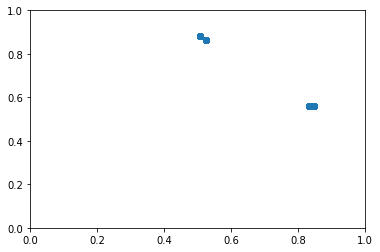

In [295]:
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.scatter(x,y)
#plt.scatter(x1,y1)

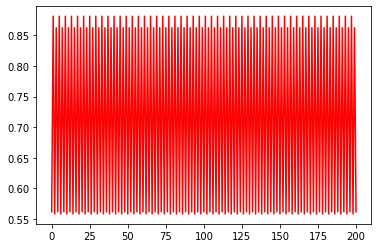

In [296]:
plt.plot(y, 'r')
#plt.plot(x)

In [297]:
len(set(x))

4

In [298]:
len(set(y))

4

In [299]:
len(set(x))

4

In [300]:
x

(0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8330114534213704,
 0.5075916670980404,
 0.8492145929142838,
 0.524273580877246,
 0.8

In [301]:
y

(0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.561939831168212,
 0.8809312271380403,
 0.5584533929073902,
 0.8621492223109042,
 0.5